In [4]:
from lxml import etree
import json
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline  
import seaborn as sns


# Parsing 

In [ ]:
data_dict = {}
for elem in data: 
    data_dict[elem[0].get('qualifier')] = elem[1]

In [ ]:
data_dict

In [7]:
def parse(file_path): 
    i = 0 
    tmp = ''
    key = ''
    xml2 =etree.iterparse(file_path, recover=True)
    data = []
    for action, elem in xml2:
        data.append((elem.attrib,elem.text))
    data_dict = {}
    for elem in data: 
        try : 
            tmp = key 
            key = elem[0].get('qualifier')
            if key == tmp : 
                i = i + 1 
                data_dict[key + str(i)] = elem[1]
            else : 
                i = 0 
                data_dict[key] = elem[1]
        except TypeError: 
                data_dict['None'] = elem[1]
    return data_dict


### Get all data 

In [8]:
import os
rootdir = '/Users/nourghaliaabassi/Desktop/papers-import'
nchouf = os.walk(rootdir)


In [9]:
all_data = {}
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        path = os.path.join(subdir, file)
        if 'dublin_core' in (path) : 
            num_doc = subdir.split('/')[-1]
            if num_doc in all_data.keys():
                #print(num_doc)
                all_data[num_doc+'_'] = parse(path)
            else : 
                all_data[num_doc] = parse(path)

In [10]:
all_data.values()

dict_values([{'author': 'Downton, Michael P.', 'accessioned': '2017-06-19T14:15:51Z', 'available': '2017-06-19T14:15:51Z', 'issued': '2015-07', 'citation': 'Downton, M. P. (2015). “That’s What Everyone Else Is Saying…”: Collaborative Reflection-in-Action during Creative Activities In  Lindwall, O., Häkkinen, P., Koschman, T. Tchounikine, P.  Ludvigsen, S. (Eds.) (2015). Exploring the Material Conditions of Learning: The Computer Supported Collaborative Learning (CSCL) Conference 2015, Volume 1. Gothenburg, Sweden: The International Society of the Learning Sciences.', 'uri': 'https://doi.dx.org/10.22318/cscl2015.105', 'abstract': 'With the progression of more user-friendly music production software packages (i.e., Apple’s GarageBand) and the importance of social media, learners are engaging with music without having any formal education on important musical concepts.  It has been suggested that novice music learners should start with what they know how to intuitively do already, which 

In [28]:
columns = set()
for keys,items in all_data.items():
    for keys_in,items_in in items.items():
        columns.add(keys_in)

In [29]:
df_data = pd.DataFrame(index=all_data.keys(),columns=columns)

In [32]:
for ind in df_data.index:
    for column in columns: 
        try : 
            df_data.loc[ind,column] = all_data[ind][column]
        except KeyError:
            df_data.loc[ind,column] = ''

In [34]:
df_data['citation']

105    Downton, M. P. (2015). “That’s What Everyone E...
122    Fong, C., Cober, R., Messina, R., Moher, T., M...
126    Hong, H., Chai, C. S., & Hung, G. (2015). Prin...
136    d'Apollonia, S., Kunicki, S., & Bronet, M. (20...
146    Oshima, J., Oshima, R., & Fujita, W. (2015). A...
150    Davidsen, J. & Ryberg, T. (2015). “This Is the...
154    Abdu, R. (2015). The Development of Situationa...
158    Dascalu, M., Trausan-Matu, S., Dessus, P., & M...
162    Flood, V. J., Neff, M., & Abrahamson, D. (2015...
165    Yoon, S. A., Anderson, E., Koehler-Yom, J., Kl...
167    Puhl, T., Tsovaltzi, D., & Weinberger, A. (201...
169    Rossitto, C., Hernwall, P., & Collin, J. (2015...
171    Khoo, M. & Stahl, G. (2015). Constructing Know...
172    Schneider, B. & Blikstein, P. (2015). Comparin...
176    Yoon, S. A., Koehler-Yom, J., Anderson, E., Oz...
178    Matuk, C. & Linn, M. C. (2015). Examining the ...
182    Schneider, B., Sharma, K., Cuendet, S., Zuffer...
185    Zhang, J., Chen, M., Tao

In [22]:
df_data.head()

,author8,author12,None,author3,accessioned,author14,author,None,author6,author10,...,abstract,author1,author4,author20,author15,author7,author13,available,author19,author9
105,,,\n,,2017-06-19T14:15:51Z,,"Downton, Michael P.",“That’s What Everyone Else Is Saying…”: Collab...,,,...,With the progression of more user-friendly mus...,,,,,,,2017-06-19T14:15:51Z,,
122,,,\n,"Moher, Tom",2017-06-19T14:15:51Z,,"Fong, Cresencia",The 3R Orchestration Cycle: Fostering Multi-Mo...,"Slotta, James D.",,...,This paper reports on second and third iterati...,"Cober, Rebecca","Murray, Julia",,,,,2017-06-19T14:15:51Z,,
126,,,\n,,2017-06-19T14:15:51Z,,"Hong, Huang-Yao",Principle-Based Guidance to Foster Adaptive Te...,,,...,This exploratory study investigated the effect...,"Chai, Ching Sing",,,,,,2017-06-19T14:15:51Z,,
136,,,\n,,2017-06-19T14:15:51Z,,"d'Apollonia, Silvia",Connected Biology: A Usability Study of Web 2....,,,...,We incorporated traditional conceptual knowled...,"Kunicki, Suzanne",,,,,,2017-06-19T14:15:51Z,,
146,,,\n,,2017-06-19T14:15:51Z,,"Oshima, Jun",A Multivocality Approach to Epistemic Agency i...,,,...,The purpose of this study was to propose a mul...,"Oshima, Ritsuko",,,,,,2017-06-19T14:15:51Z,,


In [15]:
df_data.loc['105','citation']

'Downton, M. P. (2015). “That’s What Everyone Else Is Saying…”: Collaborative Reflection-in-Action during Creative Activities In  Lindwall, O., Häkkinen, P., Koschman, T. Tchounikine, P.  Ludvigsen, S. (Eds.) (2015). Exploring the Material Conditions of Learning: The Computer Supported Collaborative Learning (CSCL) Conference 2015, Volume 1. Gothenburg, Sweden: The International Society of the Learning Sciences.'

In [16]:
df_data.loc['105','available']

'2017-06-19T14:15:51Z'

In [17]:
def convert(arg): 
    try : 
        arg = dateutil.parser.parse(arg)
    except TypeError: 
        arg = arg 
    return arg 

In [18]:
import dateutil.parser
df_data['available'] = df_data['available'].apply(lambda x : convert(x))
df_data['accessioned'] = df_data['accessioned'].apply(lambda x : convert(x))

In [55]:
df_data[df_data['author'].str.contains("Vogel")]

,abstract,author23,author19,author2,none2,accessioned,author16,issued,author13,author21,...,author20,author8,citation,author11,none,author18,author6,author5,None,author12
78,Students often have problems formulating und u...,,,"Ufer, Stefan",Book chapter,2017-03-21 12:05:42+00:00,,2016-07,,,...,,,"Vogel, F., Kollar, I., Ufer, S., Reiss, K., & ...",,Singapore: International Society of the Learni...,,,,\n,


In [ ]:
df_

In [56]:
df_data.loc[df_data['author']== 'Abrahamson, Dor']

,abstract,author23,author19,author2,none2,accessioned,author16,issued,author13,author21,...,author20,author8,citation,author11,none,author18,author6,author5,None,author12
42,Learning scientists have been considering the ...,,,"Smyth, Cliff",Book chapter,2017-03-21 12:05:42+00:00,,2016-07,,,...,,,"Abrahamson, D., Sánchez–García, R., & Smyth, C...",,Singapore: International Society of the Learni...,,,,\n,
61,The combination of two methodological resource...,,,"Bakker, Arthur",Book chapter,2017-03-21 12:05:42+00:00,,2016-07,,,...,,,"Abrahamson, D., Shayan, S., Bakker, A., & van ...",,Singapore: International Society of the Learni...,,,,\n,


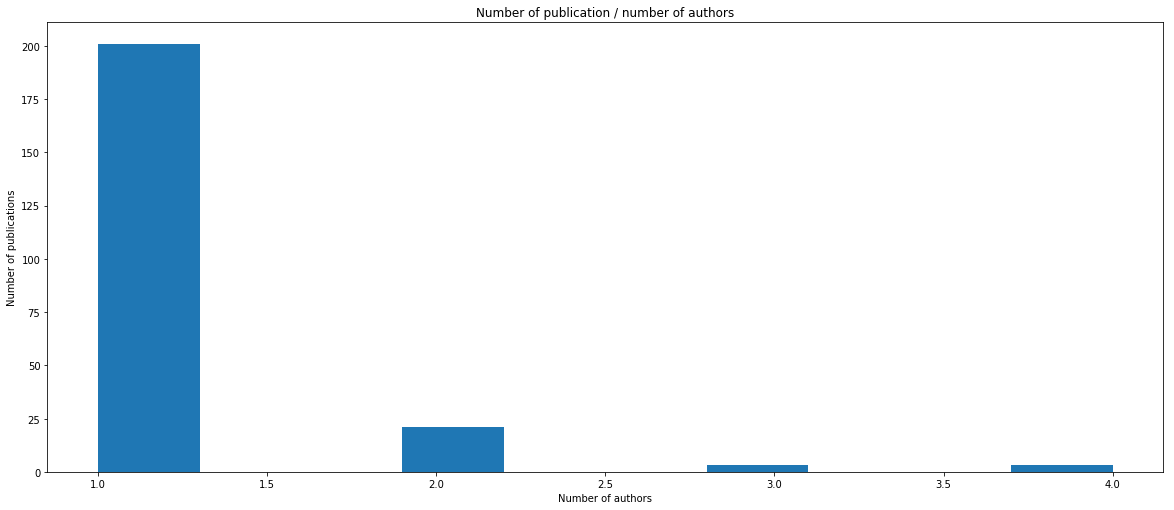

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
plt.xlabel('Number of authors')
plt.ylabel('Number of publications')
x = plt.title('Number of publication / number of authors')
x = plt.hist(df_data.groupby(by = 'author').count()['uri'])

In [58]:
y = df_data.groupby(by = 'author').count()['uri']

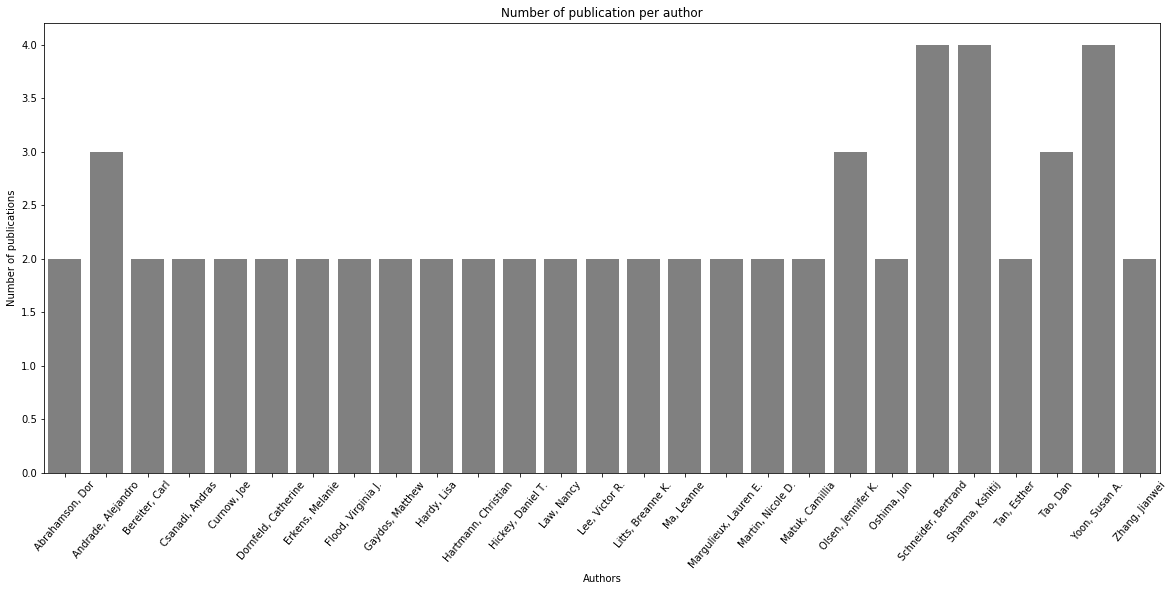

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
x = sns.barplot(y[y>1].index,y[y>1],color = 'grey')
plt.xticks(rotation=50)
plt.xlabel('Authors')
plt.ylabel('Number of publications')
x = plt.title('Number of publication per author')

In [60]:
df_data['year'] = df_data['issued'].apply(lambda x : x.split('-')[0])

In [61]:
df_data['year'].nunique()

3

In [62]:
df_data.loc['320','citation']

'Martin, N. D., Gnesdilow, D., & Puntambekar, S. (2015). Peer Scaffolding to Learn Science in Symmetrical Groups Collaborating Over Time In  Lindwall, O., Häkkinen, P., Koschman, T. Tchounikine, P.  Ludvigsen, S. (Eds.) (2015). Exploring the Material Conditions of Learning: The Computer Supported Collaborative Learning (CSCL) Conference 2015, Volume 1. Gothenburg, Sweden: The International Society of the Learning Sciences.'